## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path="data/Mouse_metadata.csv"
study_results_path="data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df=pd.read_csv(mouse_metadata_path)
study_results_df=pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mousedata=pd.merge(mouse_metadata_df, study_results_df, how ='left', on ='Mouse ID')  

# Display the data table for preview
merged_mousedata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
merged_mousedata.nunique(axis=0)

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints.

#Outputs duplicate rows except first occurence based on all columns.
duplicate_rows=merged_mousedata[merged_mousedata.duplicated()]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Drop any duplicate rows
cleaned_mousedata=merged_mousedata.drop_duplicates(["Mouse ID", "Timepoint"])
cleaned_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Recheck the number of mice
cleaned_mousedata.nunique(axis=0)

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1640
Metastatic Sites         5
dtype: int64

In [6]:
#output to excel to check the records
cleaned_mousedata.to_excel(r"data\Cleaned_mousedata.xlsx", index = False)

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
grouped_stats=cleaned_mousedata.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std', 'sem']}).reset_index()
print(grouped_stats)

  Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Text(0, 0.5, 'Mouse ID')

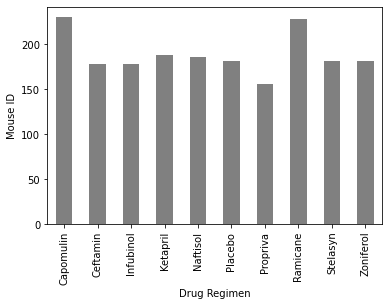

In [8]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
mice_dr=cleaned_mousedata.groupby('Drug Regimen')
mice_count=mice_dr["Mouse ID"].count()
mice_count

bar_chart1=mice_count.plot.bar(x='Drug Regimen', y='Mouse ID', color='grey')
bar_chart1.set_xlabel('Drug Regimen')
bar_chart1.set_ylabel('Mouse ID')

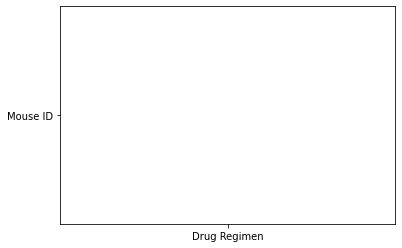

In [9]:
# Generate identical bar plot using pyplot instead of pandas.
plt.bar('Drug Regimen', 'Mouse ID')
plt.show()

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#grouped_gender=cleaned_mousedata.groupby('Sex').sum().plot(kind='pie',y=)
#grouped_gender.head()

#plot_gender=grouped_gender.plot.pie(Self, figsize=(5, 5))


ValueError: pie requires either y column or 'subplots=True'

In [11]:
# Generate identical pie plot using pyplot


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [13]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights